## Twitter Dataset Prepare

In [100]:
import pandas as pd
import numpy as np
import pickle

In [101]:
header = ['id', 'tdate', 'tmane', 'ttext', 'ttype', 'trep', 'trtf', 'tfav', 'tstcount', 'tfol', 'tfrien', 'listcount']

In [102]:
pos_twitts = pd.read_csv('train_positive.csv', sep=';', names=header)

In [103]:
neg_twitts = pd.read_csv('train_negative.csv', sep=';', names=header)

In [104]:
twitts = pd.concat([pos_twitts, neg_twitts], axis=0)
twitts.shape

(226834, 12)

In [105]:
twitts = twitts.sample(frac=1)

In [106]:
twitts.head()

,id,tdate,tmane,ttext,ttype,trep,trtf,tfav,tstcount,tfol,tfrien,listcount
17370,409370093425287168,1386436410,justrevelation,К зиме готова)магазинный день закончится прият...,1,0,0,0,337,8,8,0
5922,409903723801243648,1386563638,Nastya51515,"На улице -29, нахуй школу, я спать, Данилка пр...",-1,0,0,0,3377,34,28,0
32823,413209794128797696,1387351866,GREEN_DALEK1987,"@ImWaitingTardis ну епту, все болеют:((((9((((...",-1,0,0,0,12576,374,333,7
30980,409648923389616128,1386502888,red_unicorn0,@one_litter в школе я тоже вообще не учила анг...,1,0,0,0,1203,223,210,1
111762,425031158846722048,1390170299,the_downtrodden,"Спасите меня кто-нибудь, у меня не получается ...",-1,0,0,0,1497,43,16,1


In [107]:
twitts.ttype.unique()

array([ 1, -1])

In [108]:
pos_twitts.head()

,id,tdate,tmane,ttext,ttype,trep,trtf,tfav,tstcount,tfol,tfrien,listcount
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1


In [109]:
pos_twitts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114911 entries, 0 to 114910
Data columns (total 12 columns):
id           114911 non-null int64
tdate        114911 non-null int64
tmane        114911 non-null object
ttext        114911 non-null object
ttype        114911 non-null int64
trep         114911 non-null int64
trtf         114911 non-null int64
tfav         114911 non-null int64
tstcount     114911 non-null int64
tfol         114911 non-null int64
tfrien       114911 non-null int64
listcount    114911 non-null int64
dtypes: int64(10), object(2)
memory usage: 10.5+ MB


In [110]:
neg_twitts = pd.read_csv('train_negative.csv', sep=';', names=header)

In [111]:
neg_twitts.head()

,id,tdate,tmane,ttext,ttype,trep,trtf,tfav,tstcount,tfol,tfrien,listcount
0,408906762813579264,1386325944,dugarchikbellko,на работе был полный пиддес :| и так каждое за...,-1,0,0,0,8064,111,94,2
1,408906818262687744,1386325957,nugemycejela,"Коллеги сидят рубятся в Urban terror, а я из-з...",-1,0,0,0,26,42,39,0
2,408906858515398656,1386325966,4post21,@elina_4post как говорят обещаного три года жд...,-1,0,0,0,718,49,249,0
3,408906914437685248,1386325980,Poliwake,"Желаю хорошего полёта и удачной посадки,я буду...",-1,0,0,0,10628,207,200,0
4,408906914723295232,1386325980,capyvixowe,"Обновил за каким-то лешим surf, теперь не рабо...",-1,0,0,0,35,17,34,0


### Working with Twitter texts

In [112]:
import pandas as pd
import tqdm
import regex
import os
import re
import shutil
import matplotlib.pyplot as plt
#import artm
import codecs
from seaborn import heatmap
import time
from math import log
import operator
import numpy as np
from nltk import sent_tokenize
from pymystem3 import Mystem
import cPickle as pickle
%matplotlib inline

In [113]:
type(pos_twitts.ttext.value_counts())

pandas.core.series.Series

In [114]:
X = twitts.ttext.values

In [115]:
y = twitts.ttype.values

In [122]:
X = [prepare_text(text).decode('utf-8') for text in X]

In [123]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+|\S+')

In [124]:
def tokenize(text):
    return tokenizer.tokenize(text)

In [125]:
X = [tokenize(text) for text in X]

In [126]:
from nltk.stem.snowball import RussianStemmer
r = RussianStemmer()

In [127]:
def stem_text(text):
    return [r.stem(word) for word in text]

In [128]:
X = [stem_text(text) for text in X]

In [129]:
len(X)

226834

In [130]:
for word in X[2]:
    print word

ну
епт
все
болеют
:((((9((((9999((
а
может
мне
не
идт
в
художк
типк
вьюг
все
дел


In [131]:
print X[0]

[u'\u043a', u'\u0437\u0438\u043c', u'\u0433\u043e\u0442\u043e\u0432', u')\u043c\u0430\u0433\u0430\u0437\u0438\u043d', u'\u0434\u0435\u043d', u'\u0437\u0430\u043a\u043e\u043d\u0447', u'\u043f\u0440\u0438\u044f\u0442\u043d', u'\u043a\u0430\u043b\u044c\u044f', u'\u0432\u0435\u0447\u0435\u0440', u'\u043c\u043d\u0435', u'\u0445\u043e\u0440\u043e\u0448']


In [198]:
X_sent = [' '.join(words) for words in X]

In [225]:
def prepare_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text) # delete @user_name
    text = re.sub(r'[o_, O_, dd, dddd, ddd, 0-9, \:, \(, \), \!, \-, \;, \?, rt, \#]+', ' ', text) # delete english words
    #text = re.sub(r'[0-9]+)
    return text

In [226]:
X_sent_prepare = [prepare_text(text) for text in X_sent]

In [250]:
for x in X_sent_prepare[:10]:
    print x

к зим готов магазин ден законч приятн калья вечер мне хорош
на улиц нах школ я спат данилк прост 
ну епт все болеют а может мне не идт в художк типк вьюг все дел
в школ я тож вообщ не уч англ и сейчас так же загруз но все не так сложн мне лен ммм полезн с приятн 
спас мен кто нибуд у мен не получа нич скача 
 я не хоч в шк идт завтр 
сто ли говор о том что прост хренов 
рестора праг наконец то ужин 
ленк с тоб никт не сравн 
оказыва у мен комп час пыта выключ тепер стара включ уж минут я же стара уснут уж час 


In [134]:
print X_sent[0]

к зим готов )магазин ден законч приятн калья вечер мне хорош


In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sent_prepare, y, test_size=0.3, random_state=42)

In [136]:
print X[0]

[u'\u043a', u'\u0437\u0438\u043c', u'\u0433\u043e\u0442\u043e\u0432', u')\u043c\u0430\u0433\u0430\u0437\u0438\u043d', u'\u0434\u0435\u043d', u'\u0437\u0430\u043a\u043e\u043d\u0447', u'\u043f\u0440\u0438\u044f\u0442\u043d', u'\u043a\u0430\u043b\u044c\u044f', u'\u0432\u0435\u0447\u0435\u0440', u'\u043c\u043d\u0435', u'\u0445\u043e\u0440\u043e\u0448']


In [229]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [230]:
model = Pipeline([('count', CountVectorizer(ngram_range=(1, 3))), ('log_reg', LogisticRegression())])
model_tf_idf = Pipeline([('count', TfidfVectorizer(ngram_range=(1, 3))), ('log_reg', LogisticRegression())])

In [246]:
from sklearn.ensemble import GradientBoostingClassifier

In [249]:
#Не работает
model = Pipeline([('count', CountVectorizer(ngram_range=(1, 3))), GradientBoostingClassifier()])
model_tf_idf = Pipeline([('count', TfidfVectorizer(ngram_range=(1, 3))), GradientBoostingClassifier()])

AttributeError: 'GradientBoostingClassifier' object has no attribute 'estimators_'

In [231]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        s...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [232]:
model_tf_idf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('count', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm=u'l2', preprocessor=None, smooth_idf=Tru...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [233]:
words = model.steps[0][1].get_feature_names()
coefs = model.steps[1][1].coef_[0]

In [234]:
model_coefs = pd.Series(index=words, data=coefs)

In [235]:
model_coefs.sort_values()

обидн                               -3.180508
снаступающимтвиттерск               -3.117101
печальн                             -3.030438
грустн                              -2.725842
расстро                             -2.579094
сожален                             -2.563043
сочувств                            -2.520757
жизньбол                            -2.325578
не понрав                           -2.313070
печал                               -2.293409
жалк                                -2.220875
ненавиж                             -2.206271
заболел                             -2.198281
ужасн                               -2.104896
ув                                  -2.075551
разочарова                          -2.063273
печальк                             -2.061809
обидел                              -2.054607
не приятн                           -2.050795
пропа                               -2.029752
жал                                 -2.020499
скуча                             

In [236]:
preds = model.predict(X_test)

In [237]:
preds_tf_idf = model_tf_idf.predict(X_test)

In [238]:
from sklearn.metrics import accuracy_score

In [239]:
accuracy_score(preds, y_test)

0.76156118205463552

In [240]:
accuracy_score(preds_tf_idf, y_test)

0.74992285197866304

In [241]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

In [242]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, preds_tf_idf)
roc_auc = auc(false_positive_rate, true_positive_rate)

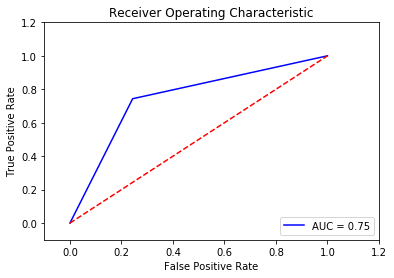

In [243]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

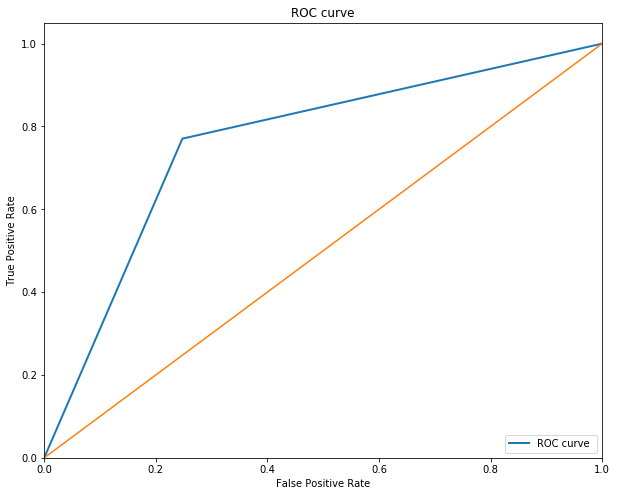

In [245]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, preds, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
#plt.savefig("ROC.png")
plt.show()

## Load Twitts from dump

In [8]:
import json
import pandas as pd

In [5]:
DUMP_PATH_APPLE = 'TwitterSearchScrapper/dump/APPLE/apple_2017-09-01_2017-11-20'
DUMP_PATH_SECHIN = 'TwitterSearchScrapper/dump/СЕЧИН/Сечин_2017-01-01_2017-11-20'
DUMP_PATH_ROSN = 'TwitterSearchScrapper/dump/РОСНЕФТЬ/Роснефть_2017-09-01_2017-11-20'
DUMP_PATH_IPHONE = 'TwitterSearchScrapper/dump/IPHONE/iphone_2017-09-01_2017-11-20'
DUMP_PATH_MAIL = 'TwitterSearchScrapper/dump/MAIL.RU/Mail.ru_2017-09-01_2017-11-20'

In [6]:
data_apple = pd.read_json(DUMP_PATH_APPLE)
data_sechin = pd.read_json(DUMP_PATH_SECHIN)
data_rosn = pd.read_json(DUMP_PATH_ROSN)
data_iphone = pd.read_json(DUMP_PATH_IPHONE)
data_mail = pd.read_json(DUMP_PATH_MAIL)

In [7]:
total_test_data = pd.concat([data_apple, data_iphone, data_mail, data_rosn, data_sechin], axis=0)

In [9]:
total_test_data.shape

(56243, 18)

In [10]:
total_test_data.head()

,attach,favorites,id,link,mentions,quote,quote_id,replies,reply,reply_id,retweet,retweet_id,retweets,text,timestamp,user_id,user_name,user_username
0,False,0,903739658512846848,https://twitter.com/Jalilov1Alisher/status/903...,[],False,0,0,False,903739658512846848,False,0,0,Восстановление токопроводящих дорожек iPhone6 ...,2017-09-01 22:01:39,2393277684,Алишер,Jalilov1Alisher
1,False,0,903706496701272064,https://twitter.com/bobaleh/status/90370649670...,[],False,0,0,False,903706496701272064,False,0,0,Это что еще за? #apple #iphone pic.twitter.com...,2017-09-01 19:49:53,107208664,Илья Егоров,bobaleh
2,False,0,903705849574633472,https://twitter.com/carrot_23/status/903705849...,[],False,0,0,False,903705849574633472,False,0,0,Берёшь в руки 5 iPhone после 7ки и он такой не...,2017-09-01 19:47:19,465395891,Ksana Carrot,carrot_23
3,True,0,903704868346626048,https://twitter.com/rozumno/status/90370486834...,[],False,0,0,False,903704868346626048,False,0,0,#Apple претендует на 50% рынка «умных» часов б...,2017-09-01 19:43:25,2225566922,Веб-студия Rozum.no,rozumno
4,False,1,903703648605175808,https://twitter.com/iskovskih/status/903703648...,[],False,0,0,False,903703648605175808,False,0,0,12 сентября презентация #apple и буквально пар...,2017-09-01 19:38:34,390055117,Mike Iskovskih,iskovskih


In [11]:
total_test_data.to_csv('test_data.csv', sep=';')